In [1]:
import requests
from bs4 import BeautifulSoup
from typing import List
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain_community.embeddings import DashScopeEmbeddings
from langchain_core.tools import tool
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.schema import Document

In [2]:

# 读取网页内容
def load_webpage(url: str) -> str:
    """加载网页内容并返回文本"""
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = "\n".join([para.get_text() for para in paragraphs])
    return text

def create_vector_store(text: str, chunk_size: int = 1000, chunk_overlap: int = 100) -> FAISS:
    """创建向量存储"""
    # 文本分割
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )
    chunks = text_splitter.split_text(text)
    
    # 创建文档对象列表
    documents = [Document(page_content=chunk) for chunk in chunks]
    
    # 创建向量存储
    embeddings = DashScopeEmbeddings(
        model="text-embedding-v2",
    )
    return FAISS.from_documents(documents, embeddings)

# 初始化向量存储
url = "https://medium.com/@libro.development/libro-a-customizable-ai-notebook-ab31bd4197b9"
webpage_content = load_webpage(url)
vector_store = create_vector_store(webpage_content)


In [3]:

# 设置语言模型
llm = ChatTongyi(
    model="qwen-max",  # 或选择其他可用模型，如 qwen-turbo, qwen-plus
    temperature=0,
    max_retries=2,
)

# 创建RAG工具
@tool
def rag_query(query: str) -> str:
    """
    从加载的网页数据中检索相关信息并生成响应
    :param query: 用户的查询
    :return: 基于检索信息生成的响应
    """
    # 获取相关文档
    relevant_docs = vector_store.similarity_search(query)
    context = "\n".join([doc.page_content for doc in relevant_docs])
    
    # 构建prompt并获取响应
    prompt = f"""基于以下背景信息回答用户的问题：
    
背景信息：
{context}

用户问题：{query}

请提供准确、相关的回答："""
    
    response = llm.invoke(prompt)
    return response.content

# 定义工具列表
tools = [rag_query]

# 初始化agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

/var/folders/np/009dffqj74vbz89c1xghgskh0000gp/T/ipykernel_659/3884561080.py:37: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use :meth:`~Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc.` instead.
  agent = initialize_agent(


In [4]:
response = agent.invoke("libro有哪些特性？")



> Entering new AgentExecutor chain...
我需要了解"libro"具体指的是什么，因为这可能是特定软件、库或其它技术的名称。但根据我的现有知识，"libro"在西班牙语中是“书”的意思。如果这里的"libro"是指某种特定的技术或者项目的话，那么我可能需要进一步查询相关信息来给出准确的回答。
Action: rag_query
Action Input: libro的特性
Observation: Libro 是一个高度可定制的笔记本解决方案，旨在支持生成式AI能力，并提供商业级用户体验。它的一些主要特性包括：

1. **灵活的场景自定义**：用户可以根据自己的需求自由组合Libro的原生模块，以实现个性化的应用场景配置。

2. **丰富的附加功能集**：除了基础的功能外，Libro还提供了许多额外的工具和服务来增强用户的开发体验。

3. **开放框架**：对于那些希望进行二次开发或深度定制的用户来说，Libro提供了一个开放框架，允许对UI界面及执行内核等各个层面进行修改。

4. **AI工作流集成**：通过Prompt Cells（提示单元格），用户能够将AI技术无缝地融入到笔记本的执行逻辑中，从而构建出流畅的人工智能工作流程。此外，解释器模式让用户可以通过自然语言与笔记本交互，从而生成所需的结果。

5. **多样的产品形态**：Libro不仅可以用作文档编辑器，还可以作为报告展示工具使用，非常适合快速创建演示文稿或汇报材料。

6. **易于数据整合**：Libro内置了SQL单元格功能，使得直接在笔记本文档中执行数据库查询变得非常简便。只需要简单的设置就可以连接至个人数据库，并且可以在SQL语句中引用Python上下文变量，查询结果也可以直接作为DataFrame对象处理。

7. **全功能代码编辑器**：Libro为用户提供了一款功能齐全的代码编辑环境，有助于提高编程效率并简化代码审查过程。

8. **持续创新与发展**：项目团队致力于探索更多关于大型模型集成的应用场景，努力让Libro成为最优秀的笔记本产品之一，在用户体验方面达到顶尖水平。

9. **开源社区参与**：欢迎来自不同背景的开发者加入Libro项目的建设之中，共同推动其进步和发展。官方GitHub仓库地址为 https://github.

INFO:     Current log level is
INFO:     Started server process [659]
INFO:     Waiting for application startup.
INFO:     Server is running at http://localhost:9563/


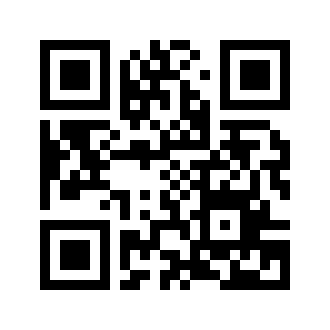

INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:9563 (Press CTRL+C to quit)


INFO:     127.0.0.1:51743 - "GET / HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:51743 - "GET /app/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:51744 - "POST /api/v1/chat-stream HTTP/1.1" 200 OK


> Entering new None chain...
我需要理解"libro"具体指的是什么，因为这个词汇在不同的上下文中可能有不同的含义。它可能是某个特定软件、库或者产品的名称。不过，根据问题的中文表述，“libro”很可能是指一种技术或产品，并且询问的是该技术/产品的特性。由于直接信息不足，我将尝试使用rag_query工具来搜索关于“libro”的相关信息。
Action: rag_query
Action Input: libro 特性INFO:     127.0.0.1:51869 - "GET /static/stream.js.map HTTP/1.1" 404 Not Found

Observation: Libro 是一个高度可定制的笔记本解决方案，旨在支持生成式AI能力，并提供商业级用户体验。以下是Libro的一些主要特性：

1. **灵活易集成**：Libro允许用户根据自身需求自由组合其原生模块，具有强大的场景定制能力。它还提供了开放框架用于自定义UI和执行内核，在所有模块层面上支持二次开发和定制。

2. **AI工作流**：
   - **提示单元（Prompt Cells）**：通过提示单元，用户可以将AI集成到笔记本的执行逻辑中，实现无缝的AI工作流。
   - **解释器模式**：这种模式让用户能够使用自然语言与笔记本互动，从而生成所需的结果，极大简化了编程过程。

3. **多种产品形态**：Libro不仅可用作文档编辑器，还能作为报告展示工具，非常适合创建演示文稿或报告。

4. **轻松的数据整合**：通过SQL单元格，Libro让用户能够方便地执行数据操作。只需简单配置即可连接到自己的数据库；并且可以在SQL中使用Python上下文变量，查询结果可以直接作为DataFrame继续处理，确保了一个流畅高效的数据工作流程。

5. 

In [ ]:
import sys
sys.path.append("/Users/johnny/Code/difizen/magent/packages/magent-ui-langchain/src")

from magent_ui_langchain import launch
launch(agent)